# Analysing evaluation results for composite reward with CAPPED accum waiting time

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option("display.max_columns", None)  # Show all columns
pd.set_option("display.max_rows", None)     # Show all rows
pd.set_option("display.max_colwidth", None) # Show full width of columns
pd.set_option("display.width", 1000)        # Set the total width of the terminal output

import sys 
sys.path.append("../")
from data_analysis_functions import generate_summary_df_from_csv, get_df_from_csv, get_trained_and_fixed_from_csv # type: ignore

In [2]:
# sys.path.remove("data_analysis_after_train")
TRAINED_CHECKPOINT_PATHS = ["reward_experiments/2x2grid/combined_reward_with_queue_length/EVALUATION/PPO_2024-05-06_11_39__alpha_0.45",
                            "reward_experiments/2x2grid_with_wait_capped/combined_reward_with_diff_accum_wait/EVALUATION/PPO_2024-05-17_12_05__alpha_0.6", 
                            "reward_experiments/2x2grid_with_wait_capped/combined_reward_with_diff_accum_wait/EVALUATION/PPO_2024-05-17_14_43__alpha_0.8", 
                            "reward_experiments/2x2grid_with_wait_capped/combined_reward_with_diff_accum_wait/EVALUATION/PPO_2024-05-17_15_54__alpha_0.7", 
                            "reward_experiments/2x2grid_with_wait_capped/combined_reward_with_diff_accum_wait/EVALUATION/PPO_2024-05-17_17_47__alpha_0.65",
                            "reward_experiments/2x2grid_with_wait_capped/combined_reward_with_diff_accum_wait/EVALUATION/PPO_2024-05-17_18_55__alpha_0.75", 
                            "reward_experiments/2x2grid_with_wait_capped/combined_reward_with_diff_accum_wait/EVALUATION/PPO_2024-05-17_19_57__alpha_0.9", 
                            "reward_experiments/2x2grid_with_wait_capped/combined_reward_with_diff_accum_wait/EVALUATION/PPO_2024-05-17_21_00__alpha_1", 
                            "reward_experiments/2x2grid_with_wait_capped/combined_reward_with_diff_accum_wait/EVALUATION/PPO_2024-05-17_21_58__alpha_1.1", 
                            "reward_experiments/2x2grid_with_wait_capped/combined_reward_with_diff_accum_wait/EVALUATION/PPO_2024-05-18_11_46__alpha_0.6",
                            "reward_experiments/2x2grid_with_wait_capped/combined_reward_with_diff_accum_wait/EVALUATION/PPO_2024-05-18_15_47__alpha_1.5",
                            "reward_experiments/2x2grid_with_wait_capped/combined_reward_with_diff_accum_wait/EVALUATION/PPO_2024-05-18_17_19__alpha_2",
                            "reward_experiments/2x2grid_with_wait_capped/combined_reward_with_diff_accum_wait/EVALUATION/PPO_2024-05-18_19_58__delta_wait_time_reward_capped", 
                            "reward_experiments/2x2grid_with_wait_capped/combined_reward_with_diff_accum_wait/EVALUATION/PPO_2024-05-18_20_46__alpha_3", 
                            "reward_experiments/2x2grid_with_wait_capped/combined_reward_with_diff_accum_wait/EVALUATION/PPO_2024-05-18_23_01__alpha_5", 
                            "reward_experiments/2x2grid_with_wait_capped/combined_reward_with_diff_accum_wait/EVALUATION/PPO_2024-05-20_09_18__alpha_10",
                            "reward_experiments/2x2grid_with_wait_capped/combined_reward_with_diff_accum_wait/EVALUATION/PPO_2024-05-20_10_39__alpha_1_reduced_observation_space",
                            "reward_experiments/2x2grid_with_wait_capped/combined_reward_with_diff_accum_wait/EVALUATION/PPO_2024-05-20_13_16__alpha_1_single_observ", 
                            "reward_experiments/2x2grid_with_wait_capped/combined_reward_with_diff_accum_wait/EVALUATION/PPO_2024-05-16_09_54__alpha_0_from_2x2_diff_acc"
                            ]

TRAINED_CHECKPOINT_PATHS_ABS = [os.path.join("/Users/loveen/Desktop/Masters project/rl-multi-agent-traffic-nonexhaust-emissions-clean", x) for x in TRAINED_CHECKPOINT_PATHS]

In [3]:
def concaten_alpha_tuning_summary_for_specific_seed(seed):
    '''
    Takes in a seed, and calls the generate summary dataframe. 
    '''

    fixed_tc_df = generate_summary_df_from_csv(path_to_checkpoint_eval_data = TRAINED_CHECKPOINT_PATHS_ABS[0], 
                                    eval_dir = "fixed_tc", 
                                    df_row_label = "fixed_tc",
                                    seed = seed)
    # trained_0_6_df = generate_summary_df_from_csv(path_to_checkpoint_eval_data = TRAINED_CHECKPOINT_PATHS_ABS[1], 
    #                                 eval_dir = "trained", 
    #                                 df_row_label = "alpha_0_6",
    #                                 seed = seed)
    trained_0_8_df = generate_summary_df_from_csv(path_to_checkpoint_eval_data = TRAINED_CHECKPOINT_PATHS_ABS[2], 
                                    eval_dir = "trained", 
                                    df_row_label = "alpha_0_8",
                                    seed = seed)
    trained_0_7_df = generate_summary_df_from_csv(path_to_checkpoint_eval_data = TRAINED_CHECKPOINT_PATHS_ABS[3], 
                                    eval_dir = "trained", 
                                    df_row_label = "alpha_0_7",
                                    seed = seed)
    trained_0_65_df = generate_summary_df_from_csv(path_to_checkpoint_eval_data = TRAINED_CHECKPOINT_PATHS_ABS[4], 
                                eval_dir = "trained", 
                                df_row_label = "alpha_0_65",
                                seed = seed)
    trained_0_75_df = generate_summary_df_from_csv(path_to_checkpoint_eval_data = TRAINED_CHECKPOINT_PATHS_ABS[5], 
                                eval_dir = "trained", 
                                df_row_label = "alpha_0_75",
                                seed = seed)
    trained_0_9_df = generate_summary_df_from_csv(path_to_checkpoint_eval_data = TRAINED_CHECKPOINT_PATHS_ABS[6], 
                                eval_dir = "trained", 
                                df_row_label = "alpha_0_9",
                                seed = seed)
    trained_1_df = generate_summary_df_from_csv(path_to_checkpoint_eval_data = TRAINED_CHECKPOINT_PATHS_ABS[7], 
                                eval_dir = "trained", 
                                df_row_label = "alpha_1",
                                seed = seed)
    trained_1_1_df = generate_summary_df_from_csv(path_to_checkpoint_eval_data = TRAINED_CHECKPOINT_PATHS_ABS[8], 
                            eval_dir = "trained", 
                            df_row_label = "alpha_1_1",
                            seed = seed)
    trained_0_6_constant_df = generate_summary_df_from_csv(path_to_checkpoint_eval_data = TRAINED_CHECKPOINT_PATHS_ABS[9], # this is with constant conditions! 
                            eval_dir = "trained", 
                            df_row_label = "alpha_0_6",
                            seed = seed)
    trained_1_5_df = generate_summary_df_from_csv(path_to_checkpoint_eval_data = TRAINED_CHECKPOINT_PATHS_ABS[10], 
                            eval_dir = "trained", 
                            df_row_label = "alpha_1_5",
                            seed = seed)
    trained_2_df = generate_summary_df_from_csv(path_to_checkpoint_eval_data = TRAINED_CHECKPOINT_PATHS_ABS[11], 
                            eval_dir = "trained", 
                            df_row_label = "alpha_2",
                            seed = seed)
    trained_delta_wait_time_df = generate_summary_df_from_csv(path_to_checkpoint_eval_data = TRAINED_CHECKPOINT_PATHS_ABS[12], 
                            eval_dir = "trained", 
                            df_row_label = "trained_delta_wait_time",
                            seed = seed)
    trained_3_df = generate_summary_df_from_csv(path_to_checkpoint_eval_data = TRAINED_CHECKPOINT_PATHS_ABS[13], 
                            eval_dir = "trained", 
                            df_row_label = "alpha_3",
                            seed = seed)
    trained_5_df = generate_summary_df_from_csv(path_to_checkpoint_eval_data = TRAINED_CHECKPOINT_PATHS_ABS[14], 
                            eval_dir = "trained", 
                            df_row_label = "alpha_5",
                            seed = seed)
    trained_10_df = generate_summary_df_from_csv(path_to_checkpoint_eval_data = TRAINED_CHECKPOINT_PATHS_ABS[15], 
                            eval_dir = "trained", 
                            df_row_label = "alpha_10",
                            seed = seed)
    trained_0_df = generate_summary_df_from_csv(path_to_checkpoint_eval_data = TRAINED_CHECKPOINT_PATHS_ABS[18], 
                            eval_dir = "trained", 
                            df_row_label = "alpha_0",
                            seed = seed)
    
    alpha_tuning_experiment_df = pd.concat([fixed_tc_df,
                                    #  trained_0_6_df,
                                     trained_0_df,
                                     trained_0_6_constant_df,
                                     trained_0_65_df,
                                     trained_0_7_df,
                                     trained_0_75_df,
                                     trained_0_8_df,
                                     trained_0_9_df,
                                     trained_1_df,
                                     trained_1_1_df, 
                                     trained_1_5_df,
                                     trained_2_df,
                                     trained_3_df,
                                     trained_5_df,
                                     trained_10_df,
                                     trained_delta_wait_time_df], axis=0)
    return alpha_tuning_experiment_df

def concaten_reducing_obs_investigation_summary_for_specific_seed(seed):
    '''
    Takes in a seed, and calls the generate summary dataframe. 
    '''
    fixed_tc_df = generate_summary_df_from_csv(path_to_checkpoint_eval_data = TRAINED_CHECKPOINT_PATHS_ABS[0], 
                                    eval_dir = "fixed_tc", 
                                    df_row_label = "fixed_tc",
                                    seed = seed)
    
    trained_1_reduced_obs_df = generate_summary_df_from_csv(path_to_checkpoint_eval_data = TRAINED_CHECKPOINT_PATHS_ABS[16], 
                            eval_dir = "trained", 
                            df_row_label = "alpha_1_reduced_observations",
                            seed = seed)
    trained_1_single_obs_df = generate_summary_df_from_csv(path_to_checkpoint_eval_data = TRAINED_CHECKPOINT_PATHS_ABS[17], 
                            eval_dir = "trained", 
                            df_row_label = "alpha_1_single_obs",
                            seed = seed)
    trained_1_df = generate_summary_df_from_csv(path_to_checkpoint_eval_data = TRAINED_CHECKPOINT_PATHS_ABS[7], 
                                eval_dir = "trained", 
                                df_row_label = "alpha_1",
                                seed = seed)
    trained_delta_wait_time_df = generate_summary_df_from_csv(path_to_checkpoint_eval_data = TRAINED_CHECKPOINT_PATHS_ABS[12], 
                            eval_dir = "trained", 
                            df_row_label = "trained_delta_wait_time",
                            seed = seed)
    reducing_obs_experiment_df = pd.concat([fixed_tc_df,
                                    trained_1_df,
                                    trained_1_reduced_obs_df,
                                    trained_1_single_obs_df, 
                                    trained_delta_wait_time_df], axis=0)
    return reducing_obs_experiment_df

get dfs for all seeds, and concat

In [4]:
SUMO_SEEDS = [10, 15, 22, 31, 55, 39, 83, 49, 51, 74]
SUMO_SEEDS = [10, 22, 39, 31, 55]

SUMO_SEEDS = [10, 15, 22, 39, 31, 55]

alpha_dfs = [concaten_alpha_tuning_summary_for_specific_seed(seed) for seed in SUMO_SEEDS]

# Step 2: Concatenate them along the row axis
alpha_df_combined = pd.concat(alpha_dfs, axis=0, ignore_index=False)

alpha_df_combined

,sys_abs_accel_episode_mean,sys_abs_accel_episode_rms,sys_abs_accel_episode_var,sys_abs_accel_episode_sum,sys_abs_accel_episode_integral,sys_abs_accel_episode_ms,sys_avg_speed_episode_mean,sys_avg_speed_episode_max,sys_avg_speed_episode_min,sys_avg_speed_episode_range,sys_avg_speed_episode_median,sys_avg_speed_episode_variance,sys_total_stopped_episode_mean,sys_avg_waiting_time_episode_mean,1_abs_accel_sum,2_abs_accel_sum,5_abs_accel_sum,6_abs_accel_sum,1_abs_accel_mean,2_abs_accel_mean,5_abs_accel_mean,6_abs_accel_mean,1_accumulated_waiting_time_mean,2_accumulated_waiting_time_mean,5_accumulated_waiting_time_mean,6_accumulated_waiting_time_mean,all_agents_abs_accel_episode_rms,all_agents_abs_accel_episode_mean,tot_agent_stopped_episode_mean,tot_agent_stopped_episode_sum,tot_agent_accum_wait_time
fixed_tc,17.799791,19.427774,60.617974,88998.956683,88978.900209,377.438422,6.265263,15.287334,0.272280,15.015054,6.576319,4.984019,11.6588,241.2870,21770.531872,15099.992729,15729.443930,10825.662088,4.354106,3.019999,3.145889,2.165132,92.7130,63.6820,71.5226,49.6070,14.415043,12.685126,11.6588,58294.0,277.5246
alpha_0,0.217415,1.375859,1.846089,1087.072730,1087.072730,1.892989,0.095051,15.287334,0.000000,15.287334,0.000000,0.801492,74.5494,182870.5416,532.351673,260.888503,279.987995,0.000000,0.106470,0.052178,0.055998,0.000000,33493.6000,16757.3000,16706.1000,0.0000,1.355469,0.214646,74.5494,372747.0,66957.0000
alpha_0_6,4.054267,4.626360,4.967122,20271.332896,20268.856422,21.403206,2.216566,15.287334,0.000000,15.287334,2.147648,1.233980,37.3192,91546.0530,3837.162571,2632.047577,3508.684766,2538.816864,0.767433,0.526410,0.701737,0.507763,16794.9888,0.0002,16706.1056,0.0000,3.097057,2.503342,37.3192,186596.0,33501.0946
alpha_0_65,9.393325,10.484188,21.687984,46966.622767,46961.978690,109.918192,4.429927,15.287334,1.040909,14.246425,4.392482,1.134501,19.5140,45995.1320,3264.630242,2620.200211,12151.233173,11064.882482,0.652926,0.524040,2.430247,2.212976,16794.9110,0.0000,3.7310,2.2140,6.880134,5.820189,19.5140,97570.0,16800.8560
alpha_0_7,17.450024,18.910003,53.095475,87250.121026,87241.893196,357.588201,5.433512,15.287334,1.784191,13.503143,5.379081,1.218217,12.7814,212.8304,29550.411369,10169.799439,12513.436335,11582.499339,5.910082,2.033960,2.502687,2.316500,1189.7762,2.4522,2.8668,2.6156,14.261544,12.763229,12.7814,63907.0,1197.7108
alpha_0_75,15.743942,17.049551,42.824039,78719.709837,78712.026743,290.687183,10.216625,15.287334,5.788285,9.499049,10.240861,1.432552,1.6166,8.5526,15224.893217,13092.581610,13331.567326,11180.822984,3.044979,2.618516,2.666313,2.236165,3.7680,2.3372,2.4164,1.4978,11.887095,10.565973,1.6166,8083.0,10.0194
alpha_0_8,16.793392,18.007421,42.257650,83966.960324,83961.399982,324.267215,9.959371,15.287334,5.265554,10.021780,9.951863,1.455701,1.8298,9.2852,16450.556734,13437.644662,14543.097699,12302.916248,3.290111,2.687529,2.908620,2.460583,4.4596,2.0002,2.8902,1.8582,12.576094,11.346843,1.8298,9149.0,11.2082
alpha_0_9,14.808034,16.058508,38.605548,74040.167854,74035.857185,257.875685,10.426524,15.287334,7.162871,8.124463,10.412390,1.273792,1.5252,9.5266,13642.429486,12152.823917,12234.323792,10799.508498,2.728486,2.430565,2.446865,2.159902,4.1092,2.3332,2.2092,1.8916,10.955222,9.765817,1.5252,7626.0,10.5432
alpha_1,15.188050,16.485208,41.093431,75940.249388,75934.883834,271.762072,10.288791,15.287334,6.834169,8.453165,10.288984,1.236791,1.6512,10.0494,14033.467724,12660.222176,12933.978504,10710.179299,2.806694,2.532044,2.586796,2.142036,4.3720,2.7200,2.4720,1.7838,11.317634,10.067570,1.6512,8256.0,11.3478
alpha_1_1,15.375882,16.627298,40.057325,76879.408285,76875.004569,276.467050,10.307064,15.287334,6.136022,9.151312,10.320618,1.230447,1.5376,9.1100,14052.909717,12395.075599,12930.736248,11532.376213,2.810582,2.479015,2.586147,2.306475,4.0578,2.2906,1.9852,1.7828,11.413049,10.182220,1.5376,7688.0,10.1164


In [5]:
# Step 3: Compute the mean for each row
df_average_whole_experiment = alpha_df_combined.groupby(alpha_df_combined.index).mean()
df_average_whole_experiment

,sys_abs_accel_episode_mean,sys_abs_accel_episode_rms,sys_abs_accel_episode_var,sys_abs_accel_episode_sum,sys_abs_accel_episode_integral,sys_abs_accel_episode_ms,sys_avg_speed_episode_mean,sys_avg_speed_episode_max,sys_avg_speed_episode_min,sys_avg_speed_episode_range,sys_avg_speed_episode_median,sys_avg_speed_episode_variance,sys_total_stopped_episode_mean,sys_avg_waiting_time_episode_mean,1_abs_accel_sum,2_abs_accel_sum,5_abs_accel_sum,6_abs_accel_sum,1_abs_accel_mean,2_abs_accel_mean,5_abs_accel_mean,6_abs_accel_mean,1_accumulated_waiting_time_mean,2_accumulated_waiting_time_mean,5_accumulated_waiting_time_mean,6_accumulated_waiting_time_mean,all_agents_abs_accel_episode_rms,all_agents_abs_accel_episode_mean,tot_agent_stopped_episode_mean,tot_agent_stopped_episode_sum,tot_agent_accum_wait_time
alpha_0,0.212196,1.344317,1.765109,1060.980073,1060.980073,1.809793,0.089589,14.127932,0.000000,14.127932,0.000000,0.656435,74.374567,182022.258233,529.854020,263.741890,265.076737,0.000000,0.105971,0.052748,0.053015,0.000000,33444.033333,16682.966667,16655.166667,0.000000,1.340918,0.211735,74.374567,371872.833333,66782.166667
alpha_0_6,3.754936,4.283039,4.250004,18774.679244,18772.960146,18.375374,2.120825,14.127932,0.050108,14.077824,2.039825,1.077310,37.203333,91022.971933,3219.387395,2640.747874,3026.966397,2604.590441,0.643877,0.528150,0.605393,0.520918,16738.078500,0.006733,16655.168467,0.000400,2.833567,2.298338,37.203333,186016.666667,33393.254100
alpha_0_65,9.255897,10.378306,22.053661,46279.483479,46274.082646,107.808017,4.366889,14.127932,0.685287,13.442645,4.333756,1.045596,19.486667,45718.855000,2876.478714,2581.992465,11736.897300,11603.071718,0.575296,0.516398,2.347379,2.320614,16738.035167,0.000000,3.382133,2.603867,6.854415,5.759688,19.486667,97433.333333,16744.021167
alpha_0_7,17.256450,18.697644,51.827882,86282.252335,86272.312236,349.645301,5.418304,14.127932,1.374063,12.753869,5.406984,1.137257,12.504833,188.927233,29870.218543,10041.412787,11822.537069,11694.943062,5.974044,2.008283,2.364507,2.338989,1104.569067,2.108100,2.946967,2.365400,14.182554,12.685822,12.504833,62524.166667,1111.989533
alpha_0_75,14.493152,15.737448,37.688064,72465.758174,72458.477922,248.106739,10.413790,14.450227,4.144585,10.305642,10.438741,1.405402,1.491367,8.840200,12274.650317,11920.194506,12211.383028,11552.642795,2.454930,2.384039,2.442277,2.310529,3.488833,2.252467,2.425433,1.783133,10.817290,9.591774,1.491367,7456.833333,9.949867
alpha_0_8,14.860804,16.121159,39.062785,74304.022430,74297.078017,260.714921,10.320233,14.408158,4.000914,10.407244,10.336411,1.430900,1.575300,9.287967,12798.257111,12162.831542,12515.942276,11828.685311,2.559651,2.432566,2.503188,2.365737,3.603033,2.463300,2.528933,1.966333,11.104785,9.861143,1.575300,7876.500000,10.561600
alpha_0_9,14.331430,15.579641,37.394257,71657.149168,71651.208292,242.897220,10.444521,14.488262,4.272936,10.215327,10.479497,1.377247,1.489533,9.227967,11961.108455,11836.590515,12005.701998,11462.203394,2.392222,2.367318,2.401140,2.292441,3.175367,2.640400,2.338000,2.139767,10.678704,9.453121,1.489533,7447.666667,10.293533
alpha_1,14.459642,15.697383,37.376478,72298.209080,72291.067242,246.613850,10.412068,14.447998,4.173386,10.274612,10.439003,1.340806,1.503067,9.197267,12004.695204,12009.046708,12251.140263,11391.237936,2.400939,2.401809,2.450228,2.278248,3.601500,2.498567,2.301000,1.876400,10.752342,9.531224,1.503067,7515.333333,10.277467
alpha_10,17.036136,18.251652,42.961227,85180.680460,85171.820412,333.412123,10.181157,14.260245,3.780756,10.479489,10.217267,1.427505,1.281067,5.292700,13730.717087,15124.006079,14429.317799,13939.208659,2.746143,3.024801,2.885864,2.787842,2.381967,1.854200,1.568233,0.809167,12.697309,11.444650,1.281067,6405.333333,6.613567
alpha_1_1,14.601319,15.870557,38.735463,73006.595935,73000.503770,252.165017,10.408099,14.394248,4.189308,10.204940,10.417239,1.333311,1.483433,8.878967,12017.458190,12026.531946,12170.234862,11888.964302,2.403492,2.405306,2

In [6]:
df_average_whole_experiment_ordered = df_average_whole_experiment.reindex([
                                         'alpha_0',
                                         'alpha_0_6', 
                                         'alpha_0_65', 
                                         "alpha_0_7", 
                                         "alpha_0_75", 
                                         "alpha_0_8",
                                         "alpha_0_9", 
                                         "alpha_1",
                                         "alpha_1_1",
                                         "alpha_1_5", 
                                         "alpha_2",
                                         "alpha_3",
                                         "alpha_5",
                                         "alpha_10",
                                         "trained_delta_wait_time",
                                         "fixed_tc"])

In [7]:
df_subset = df_average_whole_experiment_ordered[["sys_abs_accel_episode_sum",
                                                 "sys_abs_accel_episode_mean",
                             "sys_abs_accel_episode_ms",
                             "sys_avg_waiting_time_episode_mean",
                             "sys_avg_speed_episode_mean",

                             "1_abs_accel_mean",
                             '1_abs_accel_sum',
                             "1_accumulated_waiting_time_mean",

                             '2_abs_accel_mean',
                             '2_abs_accel_sum', 
                             "2_accumulated_waiting_time_mean",

                             '5_abs_accel_mean', 
                             '5_abs_accel_sum',
                             "5_accumulated_waiting_time_mean",

                             '6_abs_accel_mean', 
                             '6_abs_accel_sum',
                             "6_accumulated_waiting_time_mean"
                             ]]

df_subset

,sys_abs_accel_episode_sum,sys_abs_accel_episode_mean,sys_abs_accel_episode_ms,sys_avg_waiting_time_episode_mean,sys_avg_speed_episode_mean,1_abs_accel_mean,1_abs_accel_sum,1_accumulated_waiting_time_mean,2_abs_accel_mean,2_abs_accel_sum,2_accumulated_waiting_time_mean,5_abs_accel_mean,5_abs_accel_sum,5_accumulated_waiting_time_mean,6_abs_accel_mean,6_abs_accel_sum,6_accumulated_waiting_time_mean
alpha_0,1060.980073,0.212196,1.809793,182022.258233,0.089589,0.105971,529.854020,33444.033333,0.052748,263.741890,16682.966667,0.053015,265.076737,16655.166667,0.000000,0.000000,0.000000
alpha_0_6,18774.679244,3.754936,18.375374,91022.971933,2.120825,0.643877,3219.387395,16738.078500,0.528150,2640.747874,0.006733,0.605393,3026.966397,16655.168467,0.520918,2604.590441,0.000400
alpha_0_65,46279.483479,9.255897,107.808017,45718.855000,4.366889,0.575296,2876.478714,16738.035167,0.516398,2581.992465,0.000000,2.347379,11736.897300,3.382133,2.320614,11603.071718,2.603867
alpha_0_7,86282.252335,17.256450,349.645301,188.927233,5.418304,5.974044,29870.218543,1104.569067,2.008283,10041.412787,2.108100,2.364507,11822.537069,2.946967,2.338989,11694.943062,2.365400
alpha_0_75,72465.758174,14.493152,248.106739,8.840200,10.413790,2.454930,12274.650317,3.488833,2.384039,11920.194506,2.252467,2.442277,12211.383028,2.425433,2.310529,11552.642795,1.783133
alpha_0_8,74304.022430,14.860804,260.714921,9.287967,10.320233,2.559651,12798.257111,3.603033,2.432566,12162.831542,2.463300,2.503188,12515.942276,2.528933,2.365737,11828.685311,1.966333
alpha_0_9,71657.149168,14.331430,242.897220,9.227967,10.444521,2.392222,11961.108455,3.175367,2.367318,11836.590515,2.640400,2.401140,12005.701998,2.338000,2.292441,11462.203394,2.139767
alpha_1,72298.209080,14.459642,246.613850,9.197267,10.412068,2.400939,12004.695204,3.601500,2.401809,12009.046708,2.498567,2.450228,12251.140263,2.301000,2.278248,11391.237936,1.876400
alpha_1_1,73006.595935,14.601319,252.165017,8.878967,10.408099,2.403492,12017.458190,3.496300,2.405306,12026.531946,2.420433,2.434047,12170.234862,2.036367,2.377793,11888.964302,1.967100
alpha_1_5,73177.529923,14.635506,253.083251,7.918000,10.455830,2.386845,11934.225399,3.028800,2.498947,12494.736666,2.180067,2.434444,12172.220342,2.212900,2.345802,11729.009776,1.510067


In [8]:
df_system_wide = df_average_whole_experiment_ordered[
                            ["sys_abs_accel_episode_mean",
                            "sys_abs_accel_episode_sum",
                            "sys_abs_accel_episode_ms",
                            "sys_avg_waiting_time_episode_mean",
                            ]
                            ]
df_system_wide

,sys_abs_accel_episode_mean,sys_abs_accel_episode_sum,sys_abs_accel_episode_ms,sys_avg_waiting_time_episode_mean
alpha_0,0.212196,1060.980073,1.809793,182022.258233
alpha_0_6,3.754936,18774.679244,18.375374,91022.971933
alpha_0_65,9.255897,46279.483479,107.808017,45718.855000
alpha_0_7,17.256450,86282.252335,349.645301,188.927233
alpha_0_75,14.493152,72465.758174,248.106739,8.840200
alpha_0_8,14.860804,74304.022430,260.714921,9.287967
alpha_0_9,14.331430,71657.149168,242.897220,9.227967
alpha_1,14.459642,72298.209080,246.613850,9.197267
alpha_1_1,14.601319,73006.595935,252.165017,8.878967
alpha_1_5,14.635506,73177.529923,253.083251,7.918000


In [9]:
wait_time_descending = df_system_wide.sort_values(by="sys_avg_waiting_time_episode_mean", axis=0, ascending=False).drop(['alpha_0_9'])

wait_time_descending.loc[:, ["sys_avg_waiting_time_episode_mean",
                             "sys_abs_accel_episode_mean", 
                             "sys_abs_accel_episode_sum", 
                             "sys_abs_accel_episode_ms"]]

,sys_avg_waiting_time_episode_mean,sys_abs_accel_episode_mean,sys_abs_accel_episode_sum,sys_abs_accel_episode_ms
alpha_0,182022.258233,0.212196,1060.980073,1.809793
alpha_0_6,91022.971933,3.754936,18774.679244,18.375374
alpha_0_65,45718.855000,9.255897,46279.483479,107.808017
fixed_tc,229.906633,17.060290,85301.450252,349.391889
alpha_0_7,188.927233,17.256450,86282.252335,349.645301
alpha_0_8,9.287967,14.860804,74304.022430,260.714921
alpha_1,9.197267,14.459642,72298.209080,246.613850
alpha_1_1,8.878967,14.601319,73006.595935,252.165017
alpha_0_75,8.840200,14.493152,72465.758174,248.106739
alpha_1_5,7.918000,14.635506,73177.529923,253.083251


## Plots for report + Appendix

In [10]:
df_system_wide_whole_numbers = df_system_wide.loc[[
                                    "fixed_tc",
                                    "alpha_0",
                                    "alpha_0_9",
                                    "alpha_1",
                                    "alpha_2",
                                    "alpha_3",
                                    "alpha_5",
                                    "alpha_10",
                                    "trained_delta_wait_time"
                                    ], :]
df_system_wide_whole_numbers.loc[:, ["sys_avg_waiting_time_episode_mean",
                                     'sys_abs_accel_episode_sum',
                                     'sys_abs_accel_episode_mean',
                                     "sys_abs_accel_episode_ms"]]

,sys_avg_waiting_time_episode_mean,sys_abs_accel_episode_sum,sys_abs_accel_episode_mean,sys_abs_accel_episode_ms
fixed_tc,229.906633,85301.450252,17.060290,349.391889
alpha_0,182022.258233,1060.980073,0.212196,1.809793
alpha_0_9,9.227967,71657.149168,14.331430,242.897220
alpha_1,9.197267,72298.209080,14.459642,246.613850
alpha_2,7.645200,76620.091305,15.324018,274.097694
alpha_3,6.962000,75384.119055,15.076824,267.622595
alpha_5,6.258733,76511.674161,15.302335,274.797560
alpha_10,5.292700,85180.680460,17.036136,333.412123
trained_delta_wait_time,5.047300,84497.953547,16.899591,328.346583


/var/folders/nq/yzy9w2_93tj27l52hnwz3knm0000gn/T/ipykernel_97087/3349209581.py:51: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax1.set_ylim(0, df_system_wide_whole_numbers['sys_avg_waiting_time_episode_mean'].max() + 2)
/var/folders/nq/yzy9w2_93tj27l52hnwz3knm0000gn/T/ipykernel_97087/3349209581.py:52: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax2.set_ylim(0, df_system_wide_whole_numbers['sys_abs_accel_episode_mean'].max() + 2)


<Figure size 800x500 with 0 Axes>

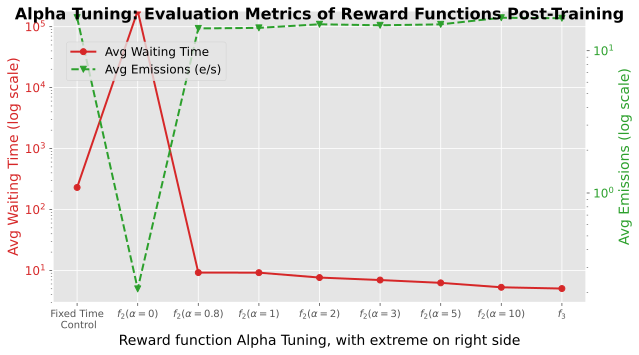

In [11]:
import matplotlib.pyplot as plt

# Create a larger figure to improve readability
plt.figure(figsize=(8, 5))
plt.style.use('ggplot')

# Plot the first series with the first y-axis
fig, ax1 = plt.subplots(figsize=(9, 5))
plt.style.use('ggplot')
%config InlineBackend.figure_format = 'svg'

# Plot the first series (avg waiting time) with a logarithmic y-axis
ax1.plot(df_system_wide_whole_numbers.index, df_system_wide_whole_numbers['sys_avg_waiting_time_episode_mean'], 
         color='tab:red', label='Avg Waiting Time', linewidth=2, linestyle='-', marker='o')
ax1.set_xlabel('Reward function Alpha Tuning, with extreme on right side', fontsize=14)
ax1.set_ylabel('Avg Waiting Time (log scale)', fontsize=14, color='tab:red')
ax1.tick_params(axis='y', labelcolor='tab:red', labelsize=12)
ax1.tick_params(axis='x', labelsize=12)
ax1.grid(True)
ax1.set_yscale('log')

# Plot the second series (absolute acceleration) on a second y-axis with a logarithmic scale
ax2 = ax1.twinx()
ax2.plot(df_system_wide_whole_numbers.index, df_system_wide_whole_numbers['sys_abs_accel_episode_mean'], 
         color='tab:green', label='Avg Emissions (e/s)', linewidth=2, linestyle='--', marker='v')
ax2.set_ylabel('Avg Emissions (log scale)', fontsize=14, color='tab:green')
ax2.tick_params(axis='y', labelcolor='tab:green', labelsize=12)
ax2.grid(False)  # Avoid double grid lines
ax2.set_yscale('log')

new_labels = [
    'Fixed Time\n Control',
    r'$f_2(\alpha=0)$',
    r'$f_2(\alpha=0.8)$',
    r'$f_2(\alpha=1)$',
    r'$f_2(\alpha=2)$',
    r'$f_2(\alpha=3)$',
    r'$f_2(\alpha=5)$',
    r'$f_2(\alpha=10)$',
    '$f_3$'
]
ax1.set_xticks(range(len(df_system_wide_whole_numbers.index)))
ax1.set_xticklabels(new_labels, fontsize=10)

# Adding legends to the plots
fig.tight_layout()
fig.suptitle('Alpha Tuning: Evaluation Metrics of Reward Functions Post-Training', fontsize=16, fontweight='bold')
fig.legend(loc='upper left', bbox_to_anchor=(0.1,0.9), fontsize=12)

# Adjust y-axis limits to make sure all data points are visible
ax1.set_ylim(0, df_system_wide_whole_numbers['sys_avg_waiting_time_episode_mean'].max() + 2)
ax2.set_ylim(0, df_system_wide_whole_numbers['sys_abs_accel_episode_mean'].max() + 2)

# Show the plot
plt.show()

<Figure size 900x500 with 0 Axes>

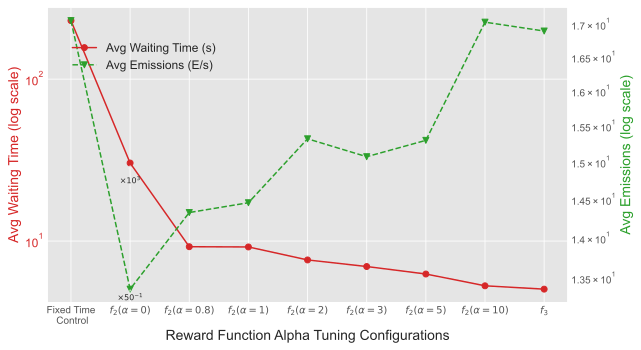

In [59]:
import matplotlib.pyplot as plt
import numpy as np

# Create a copy of the dataframe to manipulate the values for plotting
df_plot = df_system_wide_whole_numbers.copy()

# Apply specific transformations for alpha = 0
df_plot.at['alpha_0', 'sys_avg_waiting_time_episode_mean'] /= 6000  # Scale down by dividing by 1000
df_plot.at['alpha_0', 'sys_abs_accel_episode_mean'] *= 63       # Scale up by multiplying by 50

# Create a larger figure to improve readability
plt.figure(figsize=(9, 5))
plt.style.use('ggplot')

# Plot the first series with the first y-axis
fig, ax1 = plt.subplots(figsize=(9, 5))
plt.style.use('ggplot')
%config InlineBackend.figure_format = 'svg'

# Plot the first series (avg waiting time) with a logarithmic y-axis
ax1.plot(df_plot.index, df_plot['sys_avg_waiting_time_episode_mean'], 
         color='tab:red', label='Avg Waiting Time (s)', linewidth=1.5, linestyle='-', marker='o')
ax1.set_xlabel('Reward Function Alpha Tuning Configurations', fontsize=14)
ax1.set_ylabel('Avg Waiting Time (log scale)', fontsize=14, color='tab:red')
ax1.tick_params(axis='y', labelcolor='tab:red', labelsize=12)
ax1.tick_params(axis='x', labelsize=12)
ax1.grid(True)
ax1.set_yscale('log')

# Annotate the scaled value for alpha = 0 for Avg Waiting Time
scaled_waiting_value = df_plot.at['alpha_0', 'sys_avg_waiting_time_episode_mean']
ax1.annotate(r'$\times 10^3$', fontsize=8,
             xy=('alpha_0', scaled_waiting_value),
             xytext=('alpha_0', scaled_waiting_value*0.75),  # Adjust the position of the annotation
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             horizontalalignment='center')

# Plot the second series (absolute acceleration) on a second y-axis with a logarithmic scale
ax2 = ax1.twinx()
ax2.plot(df_plot.index, df_plot['sys_abs_accel_episode_mean'], 
         color='tab:green', label='Avg Emissions (E/s)', linewidth=1.5, linestyle='--', marker='v')
ax2.set_ylabel('Avg Emissions (log scale)', fontsize=14, color='tab:green')
ax2.tick_params(axis='y', labelcolor='tab:green', labelsize=12)
ax2.grid(False)  # Avoid double grid lines
ax2.set_yscale('log')

# Annotate the scaled value for alpha = 0 for Avg Emissions
scaled_emissions_value = df_plot.at['alpha_0', 'sys_abs_accel_episode_mean']
ax2.annotate(r'$\times 50^{-1}$', fontsize=8,
             xy=('alpha_0', scaled_emissions_value),
             xytext=('alpha_0', scaled_emissions_value*0.99),  # Adjust the position of the annotation
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             horizontalalignment='center')

# Change x-axis labels to include alpha sign and expressions
new_labels = [
    'Fixed Time\n Control',
    r'$f_2(\alpha=0)$',
    r'$f_2(\alpha=0.8)$',
    r'$f_2(\alpha=1)$',
    r'$f_2(\alpha=2)$',
    r'$f_2(\alpha=3)$',
    r'$f_2(\alpha=5)$',
    r'$f_2(\alpha=10)$',
    '$f_3$'
]
ax1.set_xticks(range(len(df_plot.index)))
ax1.set_xticklabels(new_labels, fontsize=10)

# Adding legends to the plots
fig.tight_layout()
# fig.suptitle('Alpha Tuning: Evaluation Metrics of Reward Functions Post-Training', fontsize=16, fontweight='bold')
fig.legend(loc='upper left', bbox_to_anchor=(0.1,0.9), fontsize=12)

# Show the plot
plt.show()

'Alpha Tuning: Evaluation Metrics of Reward Functions Post-Training'

## keep only whole numbers!

<Figure size 900x500 with 0 Axes>

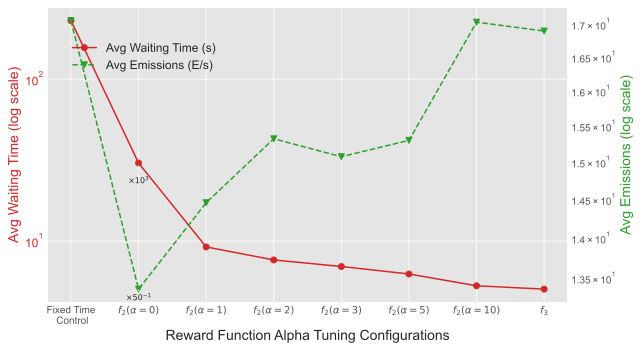

In [62]:
import matplotlib.pyplot as plt
import numpy as np

# Create a copy of the dataframe to manipulate the values for plotting
df_plot = df_system_wide_whole_numbers.copy()

# Apply specific transformations for alpha = 0
df_plot.at['alpha_0', 'sys_avg_waiting_time_episode_mean'] /= 6000  # Scale down by dividing by 1000
df_plot.at['alpha_0', 'sys_abs_accel_episode_mean'] *= 63       # Scale up by multiplying by 50

df_plot.drop(['alpha_0_9'], inplace=True)

# Create a larger figure to improve readability
plt.figure(figsize=(9, 5))
plt.style.use('ggplot')

# Plot the first series with the first y-axis
fig, ax1 = plt.subplots(figsize=(9, 5))
plt.style.use('ggplot')
%config InlineBackend.figure_format = 'svg'

# Plot the first series (avg waiting time) with a logarithmic y-axis
ax1.plot(df_plot.index, df_plot['sys_avg_waiting_time_episode_mean'], 
         color='tab:red', label='Avg Waiting Time (s)', linewidth=1.5, linestyle='-', marker='o')
ax1.set_xlabel('Reward Function Alpha Tuning Configurations', fontsize=14)
ax1.set_ylabel('Avg Waiting Time (log scale)', fontsize=14, color='tab:red')
ax1.tick_params(axis='y', labelcolor='tab:red', labelsize=12)
ax1.tick_params(axis='x', labelsize=12)
ax1.grid(True)
ax1.set_yscale('log')

# Annotate the scaled value for alpha = 0 for Avg Waiting Time
scaled_waiting_value = df_plot.at['alpha_0', 'sys_avg_waiting_time_episode_mean']
ax1.annotate(r'$\times 10^3$', fontsize=8,
             xy=('alpha_0', scaled_waiting_value),
             xytext=('alpha_0', scaled_waiting_value*0.75),  # Adjust the position of the annotation
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             horizontalalignment='center')

# Plot the second series (absolute acceleration) on a second y-axis with a logarithmic scale
ax2 = ax1.twinx()
ax2.plot(df_plot.index, df_plot['sys_abs_accel_episode_mean'], 
         color='tab:green', label='Avg Emissions (E/s)', linewidth=1.5, linestyle='--', marker='v')
ax2.set_ylabel('Avg Emissions (log scale)', fontsize=14, color='tab:green')
ax2.tick_params(axis='y', labelcolor='tab:green', labelsize=12)
ax2.grid(False)  # Avoid double grid lines
ax2.set_yscale('log')

# Annotate the scaled value for alpha = 0 for Avg Emissions
scaled_emissions_value = df_plot.at['alpha_0', 'sys_abs_accel_episode_mean']
ax2.annotate(r'$\times 50^{-1}$', fontsize=8,
             xy=('alpha_0', scaled_emissions_value),
             xytext=('alpha_0', scaled_emissions_value*0.99),  # Adjust the position of the annotation
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             horizontalalignment='center')

# Change x-axis labels to include alpha sign and expressions
new_labels = [
    'Fixed Time\n Control',
    r'$f_2(\alpha=0)$',
    r'$f_2(\alpha=1)$',
    r'$f_2(\alpha=2)$',
    r'$f_2(\alpha=3)$',
    r'$f_2(\alpha=5)$',
    r'$f_2(\alpha=10)$',
    '$f_3$'
]
ax1.set_xticks(range(len(df_plot.index)))
ax1.set_xticklabels(new_labels, fontsize=10)

# Adding legends to the plots
fig.tight_layout()
# fig.suptitle('Alpha Tuning: Evaluation Metrics of Reward Functions Post-Training', fontsize=16, fontweight='bold')
fig.legend(loc='upper left', bbox_to_anchor=(0.1,0.9), fontsize=12)

# Show the plot
plt.show()

## Agent wide metrics

In [13]:
df_agent_metrics = df_average_whole_experiment_ordered[["1_abs_accel_mean",
                             '1_abs_accel_sum',
                             "1_accumulated_waiting_time_mean",

                             '2_abs_accel_mean',
                             '2_abs_accel_sum', 
                             "2_accumulated_waiting_time_mean",

                             '5_abs_accel_mean', 
                             '5_abs_accel_sum',
                             "5_accumulated_waiting_time_mean",

                             '6_abs_accel_mean', 
                             '6_abs_accel_sum',
                             "6_accumulated_waiting_time_mean"]]
df_agent_metrics

,1_abs_accel_mean,1_abs_accel_sum,1_accumulated_waiting_time_mean,2_abs_accel_mean,2_abs_accel_sum,2_accumulated_waiting_time_mean,5_abs_accel_mean,5_abs_accel_sum,5_accumulated_waiting_time_mean,6_abs_accel_mean,6_abs_accel_sum,6_accumulated_waiting_time_mean
alpha_0,0.105971,529.854020,33444.033333,0.052748,263.741890,16682.966667,0.053015,265.076737,16655.166667,0.000000,0.000000,0.000000
alpha_0_6,0.643877,3219.387395,16738.078500,0.528150,2640.747874,0.006733,0.605393,3026.966397,16655.168467,0.520918,2604.590441,0.000400
alpha_0_65,0.575296,2876.478714,16738.035167,0.516398,2581.992465,0.000000,2.347379,11736.897300,3.382133,2.320614,11603.071718,2.603867
alpha_0_7,5.974044,29870.218543,1104.569067,2.008283,10041.412787,2.108100,2.364507,11822.537069,2.946967,2.338989,11694.943062,2.365400
alpha_0_75,2.454930,12274.650317,3.488833,2.384039,11920.194506,2.252467,2.442277,12211.383028,2.425433,2.310529,11552.642795,1.783133
alpha_0_8,2.559651,12798.257111,3.603033,2.432566,12162.831542,2.463300,2.503188,12515.942276,2.528933,2.365737,11828.685311,1.966333
alpha_0_9,2.392222,11961.108455,3.175367,2.367318,11836.590515,2.640400,2.401140,12005.701998,2.338000,2.292441,11462.203394,2.139767
alpha_1,2.400939,12004.695204,3.601500,2.401809,12009.046708,2.498567,2.450228,12251.140263,2.301000,2.278248,11391.237936,1.876400
alpha_1_1,2.403492,12017.458190,3.496300,2.405306,12026.531946,2.420433,2.434047,12170.234862,2.036367,2.377793,11888.964302,1.967100
alpha_1_5,2.386845,11934.225399,3.028800,2.498947,12494.736666,2.180067,2.434444,12172.220342,2.212900,2.345802,11729.009776,1.510067


In [14]:
45700 / 230

198.69565217391303

In [15]:
230 / 191

1.2041884816753927

When accumulated waiting time exceeds that of fixed time control baseline, we penalise 

## Get the last policy mean reward for each agent

In [16]:
# get reward functions values for all training: 
from tensorflow.python.summary.summary_iterator import summary_iterator
import tensorflow as tf

In [17]:
sys.path.append("../")
log_file = "reward_experiments/2x2grid_with_wait_capped/combined_reward_with_diff_accum_wait/TRAINING/PPO_2024-05-17_12_05__alpha_0.6/PPO_2024-05-17_12_05__alpha_0.6/PPO_2x2grid_with_wait_capped_2024-05-17_12_05_5c89a_00000_0_2024-05-17_12-05-25/events.out.tfevents.1715943947.MacBook-Pro-2"
log_file = os.path.join("/Users/loveen/Desktop/Masters project/rl-multi-agent-traffic-nonexhaust-emissions-clean", log_file)

count = 0

x = ["ray/tune/policy_reward_mean/1",
    "ray/tune/policy_reward_mean/2", 
    "ray/tune/policy_reward_mean/5",
    "ray/tune/policy_reward_mean/6"] 

policy_reward_dict = {tag:0 for tag in x}

policy_reward_series_dict = {tag:[] for tag in x}

for summary in summary_iterator(os.path.abspath(log_file)):
    for value in summary.summary.value:
        if value.tag in x:
            policy_reward_dict[value.tag] = value.simple_value
            policy_reward_series_dict[value.tag].append(value.simple_value)

# num_env_steps_sampled

# policy_reward_dict
# policy_reward_series_dict.values()[0]

Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


/var/folders/nq/yzy9w2_93tj27l52hnwz3knm0000gn/T/ipykernel_97087/3568085729.py:23: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


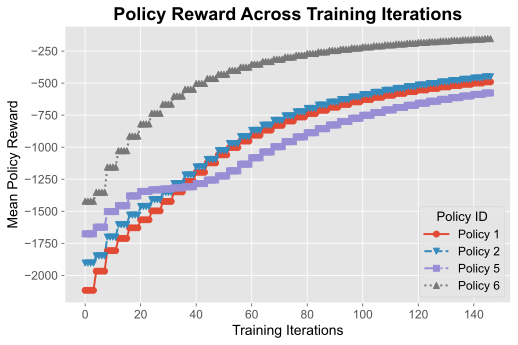

In [18]:
import matplotlib.pyplot as plt

# Create a larger figure to improve readability
plt.figure(figsize=(8, 5))
plt.style.use('ggplot')

%config InlineBackend.figure_format = 'svg'

# Plot each series with distinct styles
plt.plot(policy_reward_series_dict["ray/tune/policy_reward_mean/1"], label='Policy 1', linewidth=2, linestyle='-', marker='o')
plt.plot(policy_reward_series_dict["ray/tune/policy_reward_mean/2"], label='Policy 2', linewidth=2, linestyle='--', marker='v')
plt.plot(policy_reward_series_dict["ray/tune/policy_reward_mean/5"], label='Policy 5', linewidth=2, linestyle='-.', marker='s')
plt.plot(policy_reward_series_dict["ray/tune/policy_reward_mean/6"], label='Policy 6', linewidth=2, linestyle=':', marker='^')

# Improve the aesthetics
plt.title('Policy Reward Across Training Iterations', fontsize=18, fontweight='bold')
plt.xlabel('Training Iterations', fontsize=14)
plt.ylabel('Mean Policy Reward', fontsize=14)
plt.legend(title='Policy ID', title_fontsize='13', fontsize='12', loc='best')
plt.grid(True)

# Set the style of the plot
plt.style.use('seaborn-darkgrid')

# Adjust tick params
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.show()

## Columns of interest to compare across:

In [19]:
df_subset = df_average_whole_experiment_ordered[['sys_abs_accel_episode_sum', 
                             'sys_avg_waiting_time_episode_mean',
                             "sys_total_stopped_episode_mean",
                             "sys_avg_speed_episode_mean",
                             "tot_agent_stopped_episode_mean",
                             "tot_agent_stopped_episode_sum",
                             "tot_agent_accum_wait_time",
                             "all_agents_abs_accel_episode_mean"]]
df_subset

,sys_abs_accel_episode_sum,sys_avg_waiting_time_episode_mean,sys_total_stopped_episode_mean,sys_avg_speed_episode_mean,tot_agent_stopped_episode_mean,tot_agent_stopped_episode_sum,tot_agent_accum_wait_time,all_agents_abs_accel_episode_mean
alpha_0,1060.980073,182022.258233,74.374567,0.089589,74.374567,371872.833333,66782.166667,0.211735
alpha_0_6,18774.679244,91022.971933,37.203333,2.120825,37.203333,186016.666667,33393.254100,2.298338
alpha_0_65,46279.483479,45718.855000,19.486667,4.366889,19.486667,97433.333333,16744.021167,5.759688
alpha_0_7,86282.252335,188.927233,12.504833,5.418304,12.504833,62524.166667,1111.989533,12.685822
alpha_0_75,72465.758174,8.840200,1.491367,10.413790,1.491367,7456.833333,9.949867,9.591774
alpha_0_8,74304.022430,9.287967,1.575300,10.320233,1.575300,7876.500000,10.561600,9.861143
alpha_0_9,71657.149168,9.227967,1.489533,10.444521,1.489533,7447.666667,10.293533,9.453121
alpha_1,72298.209080,9.197267,1.503067,10.412068,1.503067,7515.333333,10.277467,9.531224
alpha_1_1,73006.595935,8.878967,1.483433,10.408099,1.483433,7417.166667,9.920200,9.620638
alpha_1_5,73177.529923,7.918000,1.407867,10.455830,1.407867,7039.333333,8.931833,9.666038


In [20]:
df_subset.drop(['alpha_0_7', "alpha_0_8", "alpha_0_8"])

,sys_abs_accel_episode_sum,sys_avg_waiting_time_episode_mean,sys_total_stopped_episode_mean,sys_avg_speed_episode_mean,tot_agent_stopped_episode_mean,tot_agent_stopped_episode_sum,tot_agent_accum_wait_time,all_agents_abs_accel_episode_mean
alpha_0,1060.980073,182022.258233,74.374567,0.089589,74.374567,371872.833333,66782.166667,0.211735
alpha_0_6,18774.679244,91022.971933,37.203333,2.120825,37.203333,186016.666667,33393.254100,2.298338
alpha_0_65,46279.483479,45718.855000,19.486667,4.366889,19.486667,97433.333333,16744.021167,5.759688
alpha_0_75,72465.758174,8.840200,1.491367,10.413790,1.491367,7456.833333,9.949867,9.591774
alpha_0_9,71657.149168,9.227967,1.489533,10.444521,1.489533,7447.666667,10.293533,9.453121
alpha_1,72298.209080,9.197267,1.503067,10.412068,1.503067,7515.333333,10.277467,9.531224
alpha_1_1,73006.595935,8.878967,1.483433,10.408099,1.483433,7417.166667,9.920200,9.620638
alpha_1_5,73177.529923,7.918000,1.407867,10.455830,1.407867,7039.333333,8.931833,9.666038
alpha_2,76620.091305,7.645200,1.458167,10.304736,1.458167,7290.833333,8.706200,10.147422
alpha_3,75384.119055,6.962000,1.355700,10.428795,1.355700,6778.500000,7.984933,9.976930


## select for report

In [21]:
df_for_appendix = 
print(df_subset.to_latex())

SyntaxError: invalid syntax (2819402256.py, line 1)

In [ ]:
print(df_subset.to_latex())

\begin{tabular}{lrrrrrrrr}
\toprule
 & sys_abs_accel_episode_sum & sys_avg_waiting_time_episode_mean & sys_total_stopped_episode_mean & sys_avg_speed_episode_mean & tot_agent_stopped_episode_mean & tot_agent_stopped_episode_sum & tot_agent_accum_wait_time & all_agents_abs_accel_episode_mean \\
\midrule
alpha_0_6 & 18874.090843 & 91252.287933 & 37.250067 & 2.116863 & 37.250067 & 186250.333333 & 33440.386867 & 2.317392 \\
alpha_0_65 & 45969.543718 & 45709.719467 & 19.457000 & 4.344613 & 19.457000 & 97285.000000 & 16742.000533 & 5.718203 \\
alpha_0_7 & 86041.633249 & 191.317733 & 12.558200 & 5.394089 & 12.558200 & 62791.000000 & 1118.672600 & 12.646364 \\
alpha_0_75 & 73150.081148 & 8.680533 & 1.509867 & 10.354517 & 1.509867 & 7549.333333 & 9.856467 & 9.706817 \\
alpha_0_8 & 75494.517324 & 9.127333 & 1.608000 & 10.253101 & 1.608000 & 8040.000000 & 10.506467 & 10.053839 \\
alpha_0_9 & 71648.036943 & 8.956933 & 1.481467 & 10.426768 & 1.481467 & 7407.333333 & 10.003400 & 9.460545 \\
alpha_1 

<Axes: >

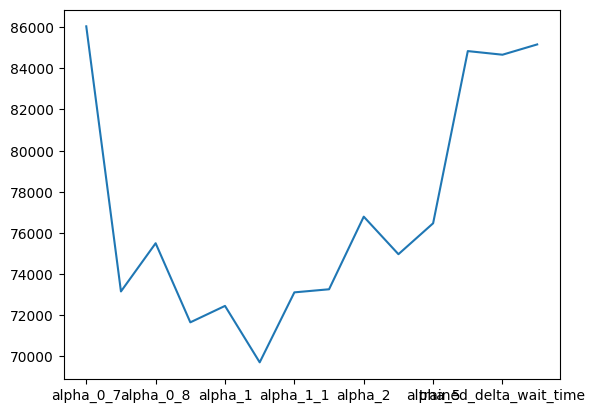

In [ ]:
df_subset['sys_abs_accel_episode_sum'].drop(['alpha_0_6','alpha_0_65']).plot()

## stats analysis

In [ ]:
fixed_tc_df = get_df_from_csv(path_to_checkpoint_eval_data = TRAINED_CHECKPOINT_PATHS_ABS[0], 
                                eval_dir = "fixed_tc", 
                                csv_file_name='eval_metrics.csv',
                                seed = 10)
trained_0_8_df = get_df_from_csv(path_to_checkpoint_eval_data = TRAINED_CHECKPOINT_PATHS_ABS[1], 
                                eval_dir = "trained",
                                csv_file_name='eval_metrics.csv',
                                seed = 10)

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
type((fixed_tc_df['1_accumulated_waiting_time']/100).diff())

pandas.core.series.Series

perform the transformations on accumulated waiting time

In [ ]:
agent_1_fc_accum_wait_group_five = fixed_tc_df['1_accumulated_waiting_time'].groupby(
    fixed_tc_df['1_accumulated_waiting_time'].index // 5).sum()

agent_1_fc_accum_wait_scale_diff = (agent_1_fc_accum_wait_group_five/100).diff()
agent_1_fc_accum_wait_scale_diff


0       NaN
1      0.00
2      0.00
3      0.01
4      0.19
5      0.26
6      0.50
7      0.77
8      0.97
9     -0.65
10    -0.67
11     0.08
12     0.69
13     0.85
14     1.00
15     1.10
16     1.31
17     1.49
18    -1.97
19    -2.22
20    -1.43
21     0.68
22     1.09
23     1.28
24     1.48
25     1.69
26     1.75
27    -2.14
28    -3.15
29    -3.34
30    -0.77
31     0.60
32     0.75
33     0.75
34     0.91
35     1.64
36    -1.05
37    -2.08
38    -0.90
39     0.33
40     1.18
41     1.65
42     1.97
43     2.03
44     2.28
45    -1.04
46    -2.86
47    -2.60
48    -2.25
49    -0.06
50     0.51
51     0.69
52     1.00
53     2.07
54    -0.57
55    -0.27
56    -0.25
57     0.40
58     1.47
59     2.00
60     2.10
61     2.26
62     2.44
63    -1.47
64    -3.47
65    -4.90
66    -3.59
67     0.53
68     1.00
69     1.00
70     1.00
71     1.13
72    -1.94
73    -2.58
74    -1.67
75    -0.09
76     0.31
77     0.49
78     0.50
79     0.56
80     0.74
81    -2.19
82    -0.86
83  

In [ ]:
# cap the series
fixed_tc_diff_capped_array = np.where(agent_1_fc_accum_wait_scale_diff.isna() | (agent_1_fc_accum_wait_scale_diff > 0), 0, agent_1_fc_accum_wait_scale_diff)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


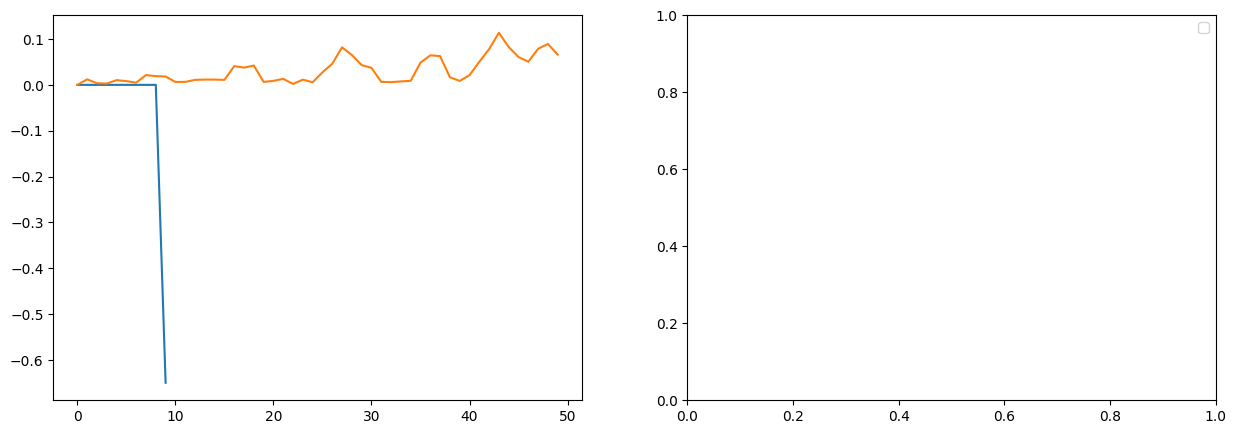

In [ ]:
fig, axes = plt.subplots(1,2, figsize=(15,5))

def plot_my_graphs(x1, x2):
    x2_ = int(x2/5)
    axes[0].plot(fixed_tc_diff_capped_array[x1:x2_])
    axes[0].set_label('fixed_tc_df_diff_capped')

    axes[0].plot((fixed_tc_df['1_abs_accel']/100)[x1:x2])
    axes[0].set_label("abs_accel")
    
plot_my_graphs(x1=0, x2=50)

plt.legend()
plt.show()

## Reducing observation space investigation

In [ ]:
SUMO_SEEDS = [10, 15, 22, 31, 55, 39, 83, 49, 51, 74]
SUMO_SEEDS = [10, 22, 39, 31, 55]

SUMO_SEEDS = [22, 10, 31]

reducing_obs_dfs = [concaten_summary_for_specific_seed(seed)[1] for seed in SUMO_SEEDS]

# Step 2: Concatenate them along the row axis
reducing_obs_dfs_combined = pd.concat(reducing_obs_dfs, axis=0, ignore_index=False)

df_average_reducing_obs_experiment = reducing_obs_dfs_combined.groupby(reducing_obs_dfs_combined.index).mean()
df_average_reducing_obs_experiment

,sys_abs_accel_episode_mean,sys_abs_accel_episode_rms,sys_abs_accel_episode_var,sys_abs_accel_episode_sum,sys_abs_accel_episode_integral,sys_abs_accel_episode_ms,sys_avg_speed_episode_mean,sys_avg_speed_episode_max,sys_avg_speed_episode_min,sys_avg_speed_episode_range,sys_avg_speed_episode_median,sys_avg_speed_episode_variance,sys_total_stopped_episode_mean,sys_avg_waiting_time_episode_mean,1_abs_accel_sum,2_abs_accel_sum,5_abs_accel_sum,6_abs_accel_sum,1_abs_accel_mean,2_abs_accel_mean,5_abs_accel_mean,6_abs_accel_mean,1_accumulated_waiting_time_mean,2_accumulated_waiting_time_mean,5_accumulated_waiting_time_mean,6_accumulated_waiting_time_mean,all_agents_abs_accel_episode_rms,all_agents_abs_accel_episode_mean,tot_agent_stopped_episode_mean,tot_agent_stopped_episode_sum,tot_agent_accum_wait_time
alpha_1,14.489468,15.684689,36.143897,72447.338693,72440.288557,246.368273,10.387029,14.592646,4.574182,10.018464,10.406724,1.241056,1.504933,9.086800,12447.798179,11941.472879,12378.019791,10967.355644,2.489560,2.388295,2.475604,2.193471,3.735200,2.359200,2.330800,1.735933,10.738816,9.546929,1.504933,7524.666667,10.161133
alpha_1_reduced_observations,13.940600,15.108626,33.957393,69703.001034,69696.717746,228.484612,10.529821,14.455497,4.034313,10.421184,10.565370,1.355008,1.427933,9.207067,11701.154206,11444.577778,11690.925230,10826.774162,2.340231,2.288916,2.338185,2.165355,3.619867,2.770800,2.056067,1.697200,10.297899,9.132686,1.427933,7139.666667,10.143933
alpha_1_single_obs,13.876128,15.095565,35.451244,69380.641983,69373.692237,228.359402,10.535239,14.441452,3.809072,10.632381,10.532761,1.299940,1.436067,9.410000,11465.257488,11501.851764,11544.281428,10895.711155,2.293051,2.300370,2.308856,2.179142,3.145333,2.798067,2.539000,1.847067,10.267092,9.081420,1.436067,7180.333333,10.329467
fixed_tc,17.032355,18.644457,57.563168,85161.774898,85148.706931,348.052372,6.315644,14.318773,0.091427,14.227346,6.692080,5.117840,11.170667,230.166600,20346.628433,14683.348335,15030.098190,10632.023942,4.069326,2.936670,3.006020,2.126405,86.798200,64.212333,64.892533,47.489533,13.870662,12.138420,11.170667,55853.333333,263.392600
trained_delta_wait_time,16.932322,18.108103,41.212741,84661.607569,84651.752674,327.929877,10.237254,14.562247,3.697146,10.865101,10.257772,1.470518,1.219667,4.857467,14657.138571,14362.428733,14594.207683,13197.474712,2.931428,2.872486,2.918842,2.639495,2.441467,1.464800,1.483333,0.651400,12.578148,11.362250,1.219667,6098.333333,6.041000


In [ ]:
df_subset = df_average_reducing_obs_experiment[['sys_abs_accel_episode_sum', 
                             'sys_avg_waiting_time_episode_mean',
                             "sys_total_stopped_episode_mean",
                             "sys_avg_speed_episode_mean",
                             "tot_agent_stopped_episode_mean",
                             "tot_agent_stopped_episode_sum",
                             "tot_agent_accum_wait_time",
                             "all_agents_abs_accel_episode_mean"]]
df_subset

,sys_abs_accel_episode_sum,sys_avg_waiting_time_episode_mean,sys_total_stopped_episode_mean,sys_avg_speed_episode_mean,tot_agent_stopped_episode_mean,tot_agent_stopped_episode_sum,tot_agent_accum_wait_time,all_agents_abs_accel_episode_mean
alpha_1,72447.338693,9.086800,1.504933,10.387029,1.504933,7524.666667,10.161133,9.546929
alpha_1_reduced_observations,69703.001034,9.207067,1.427933,10.529821,1.427933,7139.666667,10.143933,9.132686
alpha_1_single_obs,69380.641983,9.410000,1.436067,10.535239,1.436067,7180.333333,10.329467,9.081420
fixed_tc,85161.774898,230.166600,11.170667,6.315644,11.170667,55853.333333,263.392600,12.138420
trained_delta_wait_time,84661.607569,4.857467,1.219667,10.237254,1.219667,6098.333333,6.041000,11.362250


As we reduce the observation space - 